import important libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

load dataset

In [2]:
data_set=pd.read_csv('/content/Boston_House_ Dataset.csv')

In [3]:
data_set.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


drop un important col

In [4]:
data_set.drop(columns=['Unnamed: 0'],axis=0,inplace=True)

In [5]:
data_set.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


preprocessing

In [7]:

data_set.isnull().sum()


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

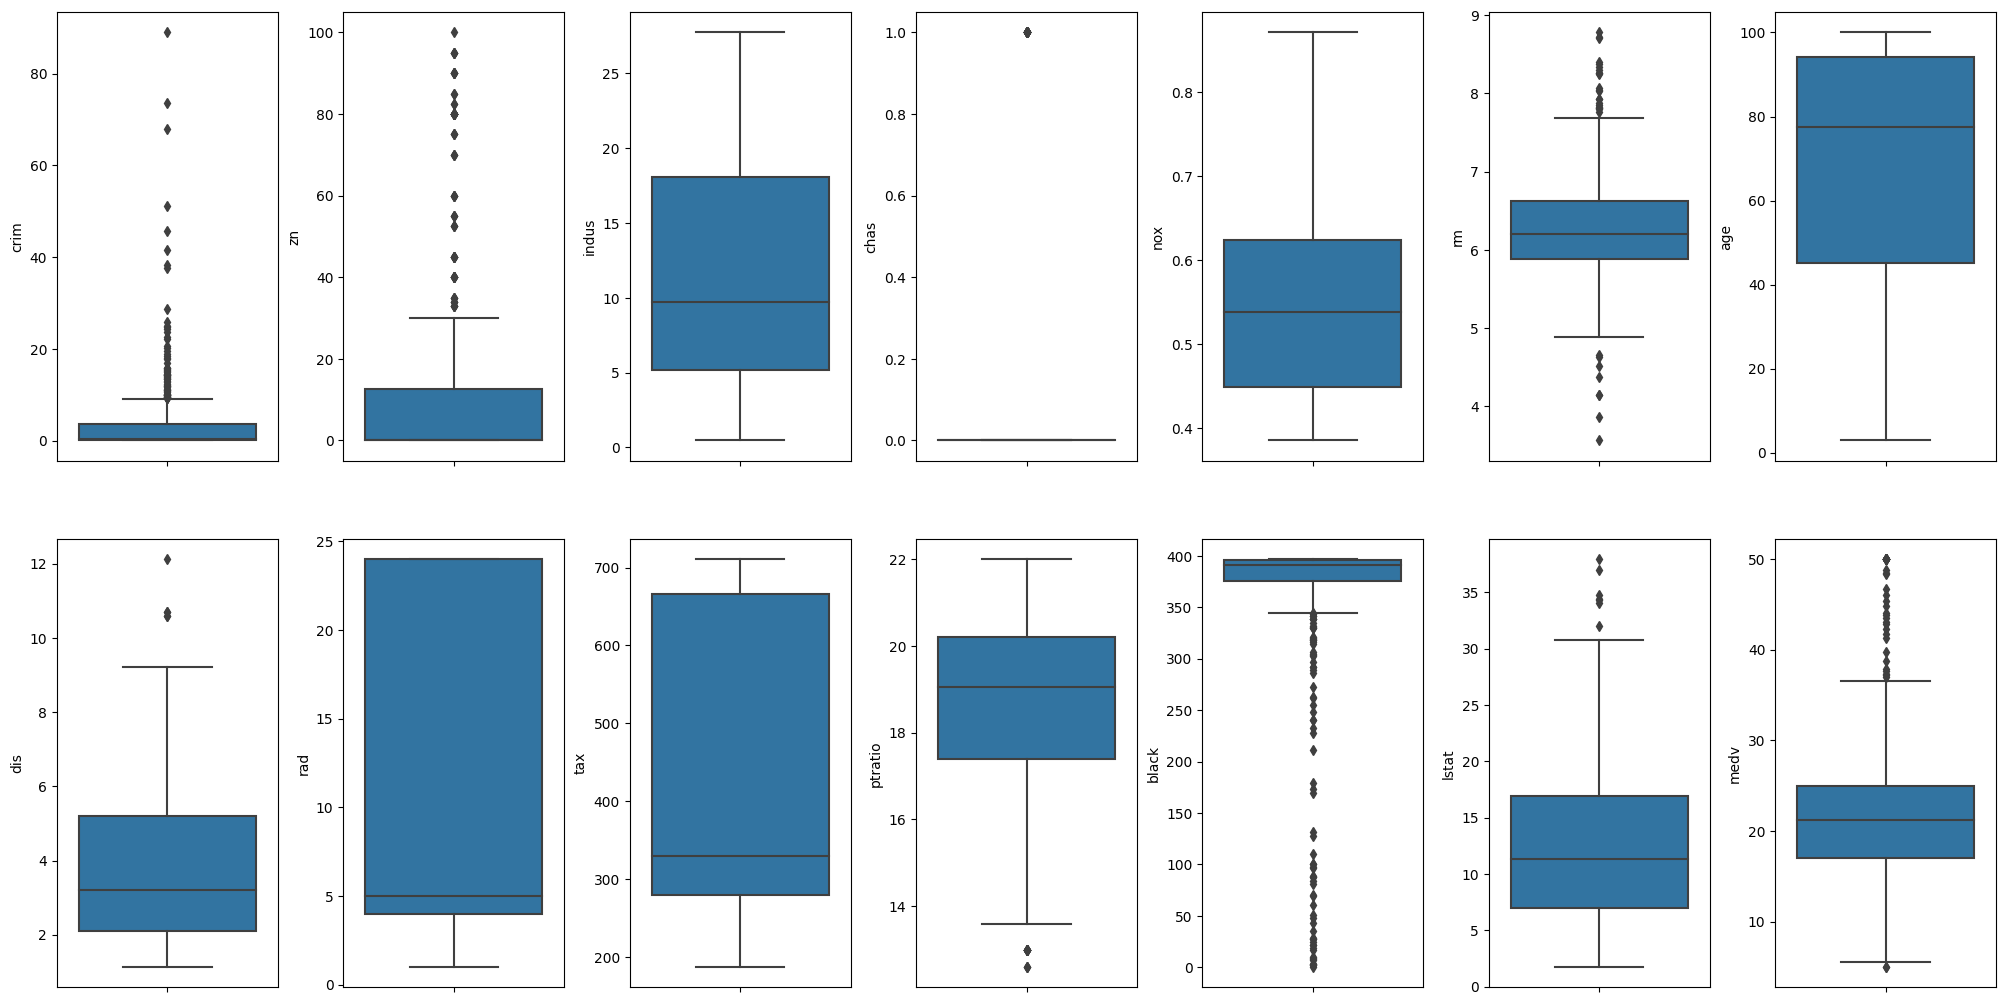

In [8]:
#box_plots
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in data_set.items():
  sns.boxplot(y=col,data=data_set,ax=ax[index])
  index+=1

plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)


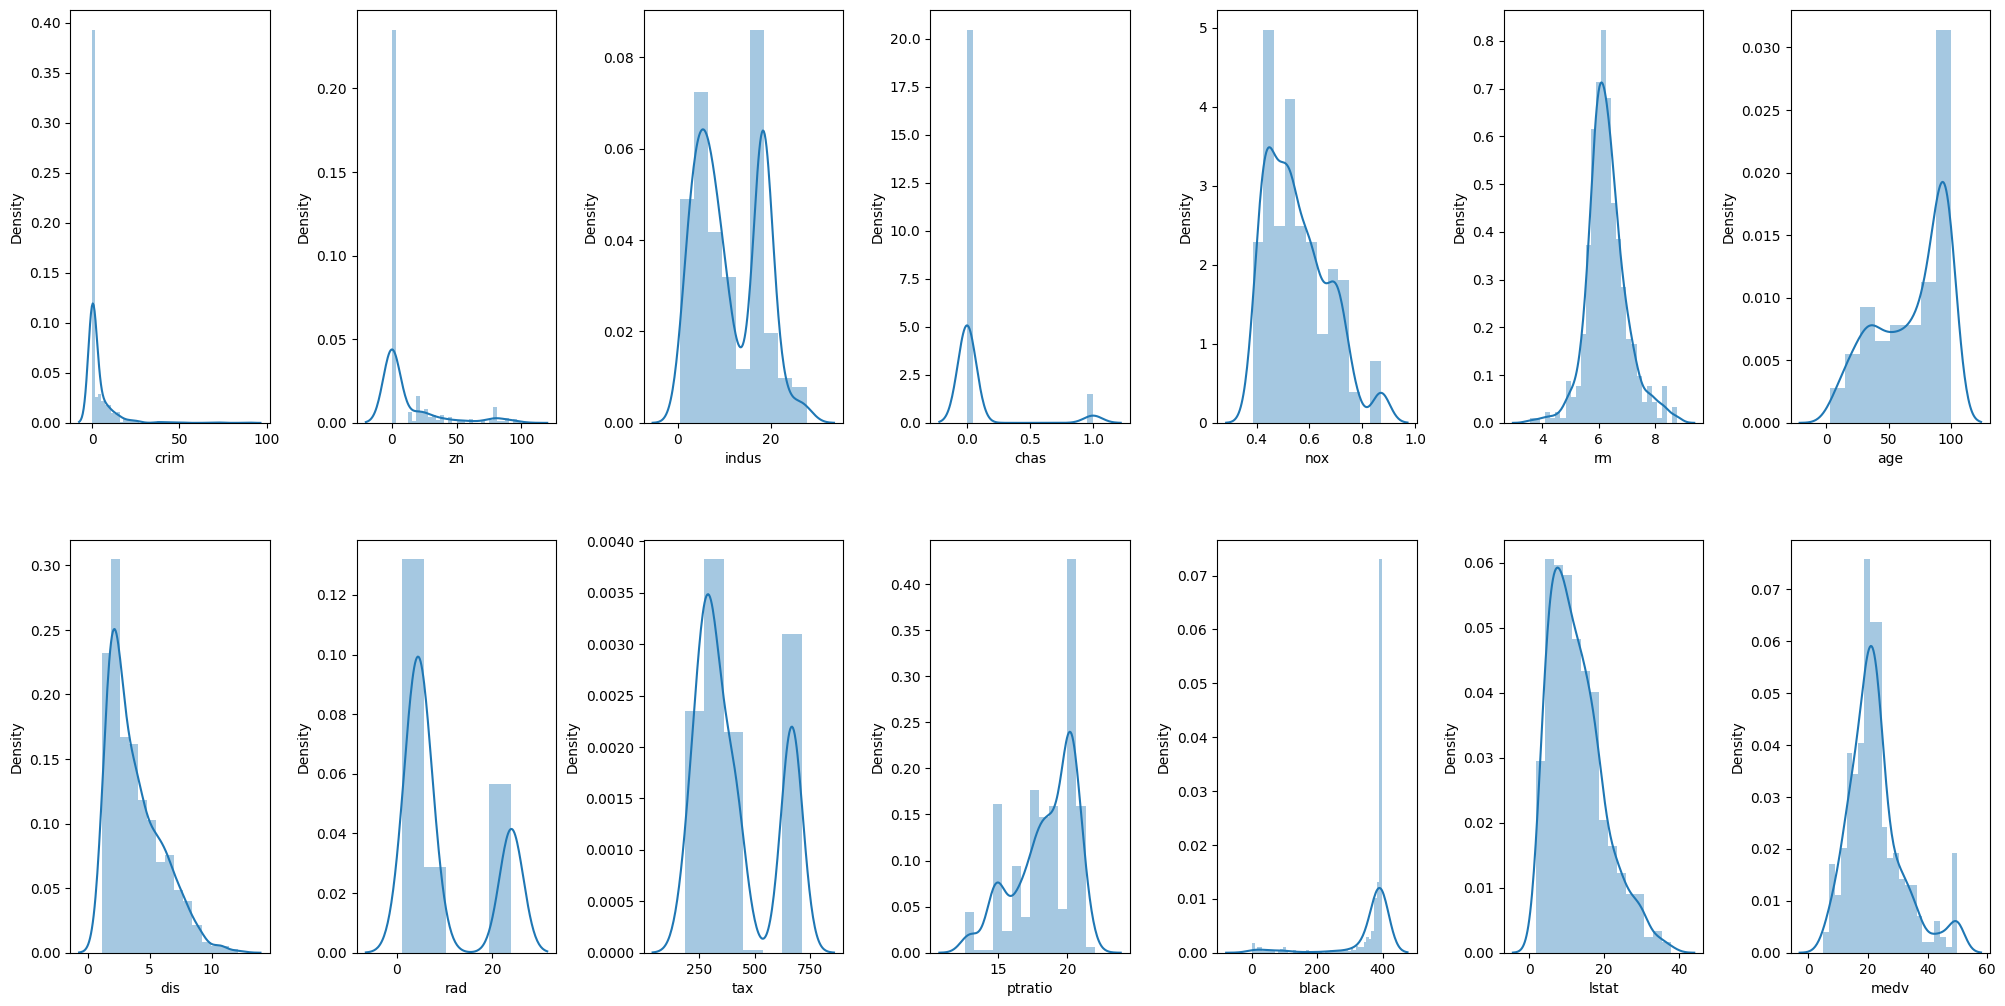

In [9]:
#dist_plots
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in data_set.items():
  sns.distplot(value,ax=ax[index])
  index+=1

plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)


In [10]:
#min_max_normalization
columns=['black','crim','zn','tax']
for column in columns:
  minn=min(data_set[column])
  maxx=max(data_set[column])
  data_set[column]=(data_set[column]-minn)/(maxx-minn)

In [12]:
#standarization
scaler=preprocessing.StandardScaler()

scaled_columns=scaler.fit_transform(data_set[columns])
scaled_columns=pd.DataFrame(scaled_columns,columns=columns)
scaled_columns.head()

,black,crim,zn,tax
0,0.441052,-0.419782,0.284830,-0.666608
1,0.441052,-0.417339,-0.487722,-0.987329
2,0.396427,-0.417342,-0.487722,-0.987329
3,0.416163,-0.416750,-0.487722,-1.106115
4,0.441052,-0.412482,-0.487722,-1.106115


In [13]:
#assign values to original dataset
for column in columns:
  data_set[column]=scaled_columns[column]

<Axes: >

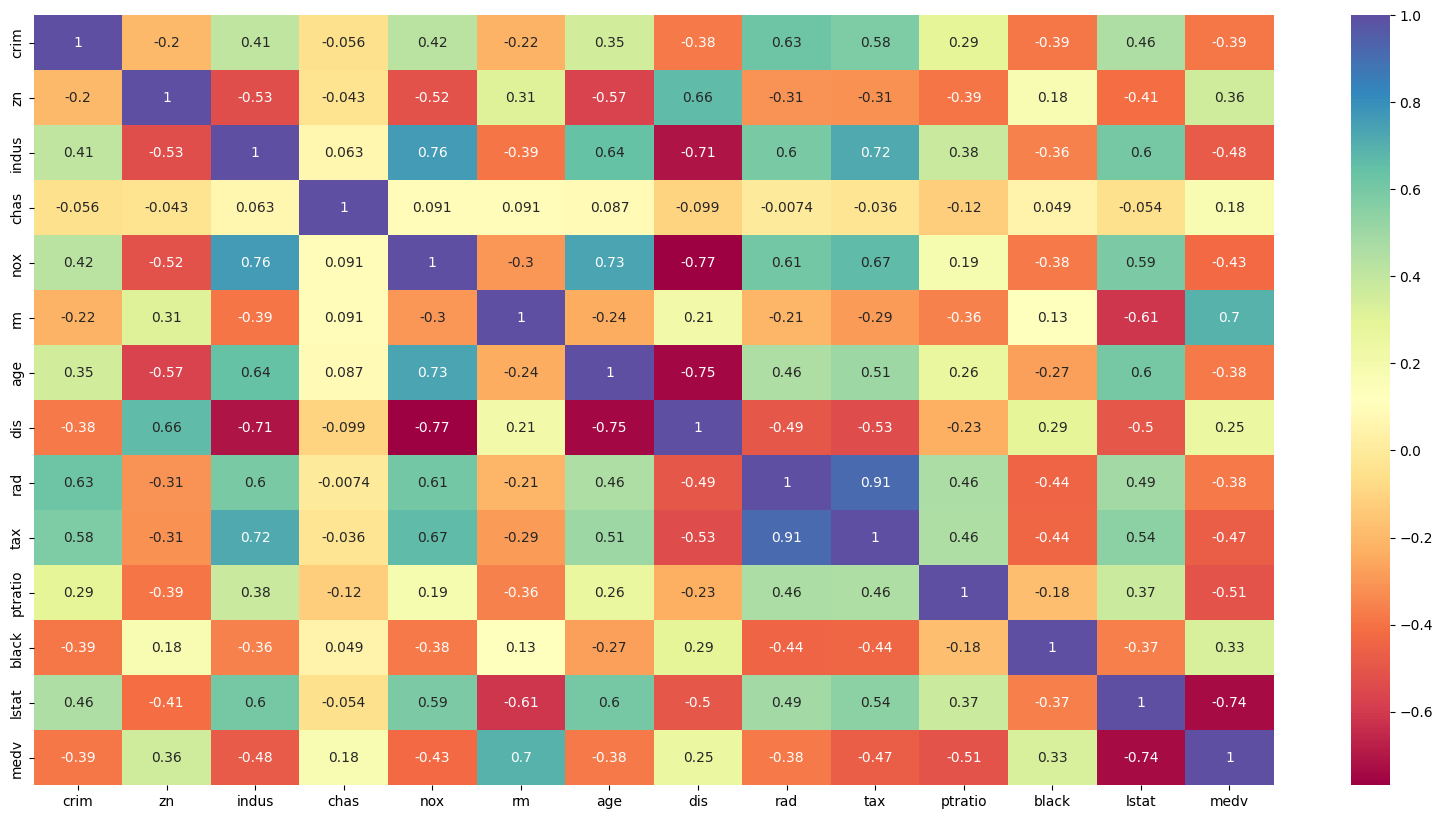

In [15]:
#co_relation matrix
co_rel=data_set.corr()
plt.figure(figsize=(20,10))
sns.heatmap(co_rel,annot=True,cmap='Spectral')

<Axes: xlabel='rm', ylabel='medv'>

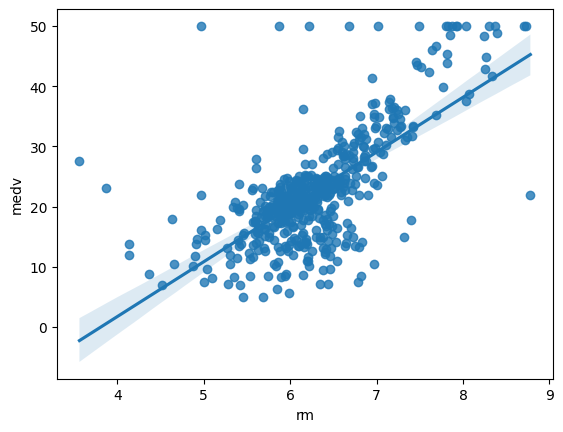

In [16]:
#plot relation between house price and istat
sns.regplot(y=data_set['medv'], x=data_set['rm'])

<Axes: xlabel='lstat', ylabel='medv'>

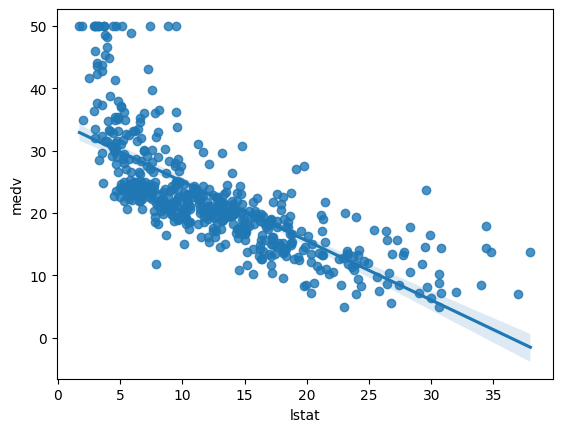

In [17]:
#plot relation between house price and istat
sns.regplot(y=data_set['medv'], x=data_set['lstat'])

split data

In [18]:
x=data_set.drop(columns=['medv','rad'],axis=1)
y=data_set['medv']

split our data

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

train model

In [20]:
def train(model,x,y):
    model.fit(x_train,y_train)

    pre=model.predict(x_test)

    #cross_validation
    cv_score=cross_val_score(model,x,y,scoring='neg_mean_squared_error')
    cv_score=np.abs(np.mean(cv_score))

    print('mean squared error',mean_squared_error(y_test,pre))

    print('cv score =',cv_score)


mean squared error 23.871005067364944
cv score = 35.58136621076916


<Axes: title={'center': 'Model Coefficients'}>

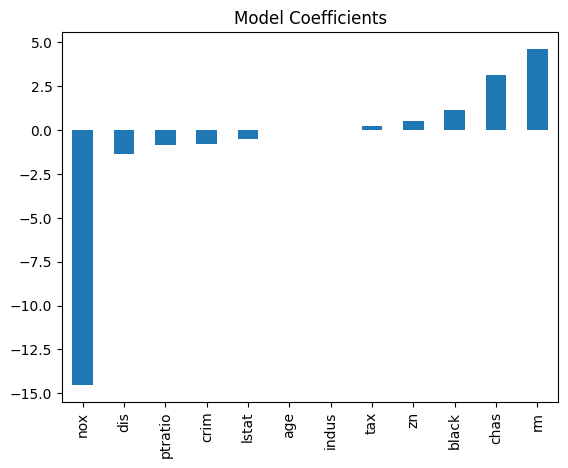

In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
train(model,x,y)
coef=pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

mean squared error 10.973779527559056
cv score = 44.4760099009901


<Axes: title={'center': 'Feature Importance'}>

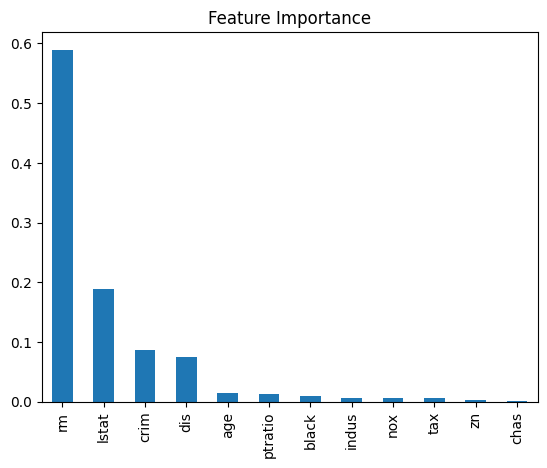

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
train(model,x,y)
coef=pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

mean squared error 10.143535196850396
cv score = 21.756059631508435


<Axes: title={'center': 'Feature Importance'}>

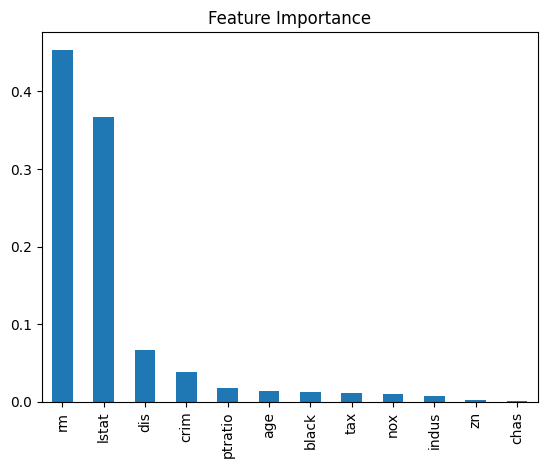

In [ ]:
# random forest
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
train(model,x,y)
coef=pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

mean squared error 10.624166023622053
cv score = 20.15481554834012


<Axes: title={'center': 'Feature Importance'}>

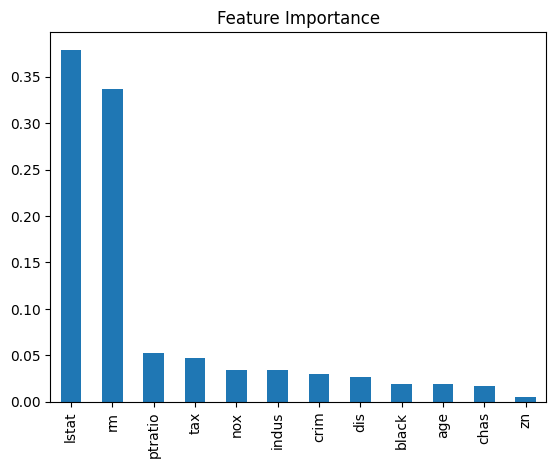

In [ ]:
# extra tree
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
train(model,x,y)
coef=pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')